In [1]:
import numpy as np
from matplotlib import pyplot as plt 
import time


In [55]:
### First we will make a method to generate the spin configuration randomly
def gen_rand_spin(L):
    spins = np.random.randint(0,2,(L,L))*2.-1.
    
    return spins

### This generates a perfectly ordered Neel state
def gen_Neel(L):
    spins = np.ones((L,L))
    for x in range(L):
        for y in range(L):
            spins[x,y] = (-1)**(x+y)
        
    return spins

### This method will randomly select a site and perform the stochastic spin update
### Returns the spin configuration after the update
def update(spins,t):
    L = len(spins)
    x = np.random.randint(0,L)
    y = np.random.randint(0,L)
    
    ### We now retrieve the spins neighboring x,y
    ### We then compute the change in energy
    deltaE = -2.*(spins[(x+1)//L,y] + spins[x-1,y] + spins[x,(y+1)//L] + spins[x,y-1])*spins[x,y]
    
    ### We now accept this flip with a probability of 1/(1+exp(deltaE/t))
    threshold = min(1.,np.exp(-deltaE/t))
    
    r = np.random.ranf()
    
    if r < threshold:
        spins[x,y] *= -1
        
    return spins

### This code runs the stochastic dynamics for specified time and system size and temperature and returns a trajectory
def run_sim(L,nsteps,temp):

    
    s = np.zeros((L,L,nsteps))
    s[:,:,0] = gen_Neel(L)

    for i in range(1,nsteps):
        s[:,:,i] = update(s[:,:,i-1],temp)
        
    return s


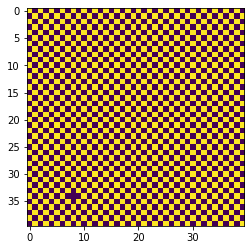

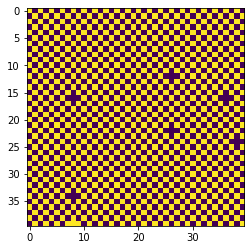

In [63]:
nsteps = 100000
L = 40
t = 0.05
s = run_sim(L,nsteps,t)

plt.imshow(s[:,:,0])
plt.show()

plt.imshow(s[:,:,10])
plt.show()